In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/DeepCalvin/Kaggle-Electricity-Cost-Prediction/refs/heads/main/electricity_cost_dataset.csv")
data.head()

,site area,structure type,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
0,1360,Mixed-use,2519.0,69,52,188,1,72,1420.0
1,4272,Mixed-use,2324.0,50,76,165,65,261,3298.0
2,3592,Mixed-use,2701.0,20,94,198,39,117,3115.0
3,966,Residential,1000.0,13,60,74,3,35,1575.0
4,4926,Residential,5990.0,23,65,32,57,185,4301.0


In [4]:
data_one_hot = pd.get_dummies(data)
data_one_hot.head()

,site area,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost,structure type_Commercial,structure type_Industrial,structure type_Mixed-use,structure type_Residential
0,1360,2519.0,69,52,188,1,72,1420.0,False,False,True,False
1,4272,2324.0,50,76,165,65,261,3298.0,False,False,True,False
2,3592,2701.0,20,94,198,39,117,3115.0,False,False,True,False
3,966,1000.0,13,60,74,3,35,1575.0,False,False,False,True
4,4926,5990.0,23,65,32,57,185,4301.0,False,False,False,True


In [5]:
X = data_one_hot.drop("electricity cost",axis=1)
y = data_one_hot["electricity cost"]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2)
len(X_train),len(X_test),len(y_train),len(y_test)

(8000, 2000, 8000, 2000)

In [7]:
print("Missing values in X_train:")
print(X_train.isnull().sum())

print("\nMissing values in y_train:")
print(y_train.isnull().sum())

Missing values in X_train:
site area                     0
water consumption             0
recycling rate                0
utilisation rate              0
air qality index              0
issue reolution time          0
resident count                0
structure type_Commercial     0
structure type_Industrial     0
structure type_Mixed-use      0
structure type_Residential    0
dtype: int64

Missing values in y_train:
0


In [8]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

#```Model 1```

In [19]:
# Setting up random seed
tf.random.set_seed(42)

# Creating Model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)])

# Compiling the model
model_1.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

# Fitting the model
history_1 = model_1.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - loss: 2838.2610 - mae: 2838.2610
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2826.2019 - mae: 2826.2019
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 2798.3999 - mae: 2798.3999
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2755.5959 - mae: 2755.5959  
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2699.3210 - mae: 2699.3210  
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 2630.7046 - mae: 2630.7046
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2550.6704 - mae: 2550.6704  
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2459.9871 - mae: 2459.9871  
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2359.3013 - mae: 2359.3013
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2249.1753 - mae: 2249.1753  
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 2130.1584 - mae: 2130.1584
Epoch 12/100

In [20]:
model_1.evaluate(X_test_scaled,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 263.5037 - mae: 263.5037


[264.5533142089844, 264.5533142089844]

#```Model 2```

In [17]:
# Setting up random seed
tf.random.set_seed(42)

# Creating Model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)])

# Compiling the model
model_2.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

# Fitting the model
history_2 = model_1.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 245.0869 - mae: 245.0869
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 245.0312 - mae: 245.0312
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 244.9777 - mae: 244.9777
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 244.9314 - mae: 244.9314
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 244.8881 - mae: 244.8881
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 244.8463 - mae: 244.8463
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 244.8086 - mae: 244.8086
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 244.7753 - mae: 244.7753  
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 244.7371 - mae: 244.7371
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 244.6952 - mae: 244.6952  
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 244.6640 - mae: 244.6640
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━

In [18]:
model_2.evaluate(X_test_scaled,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2851.0039 - mae: 2851.0039  


[2831.536865234375, 2831.536865234375]

### Plotting Loss curves for both models

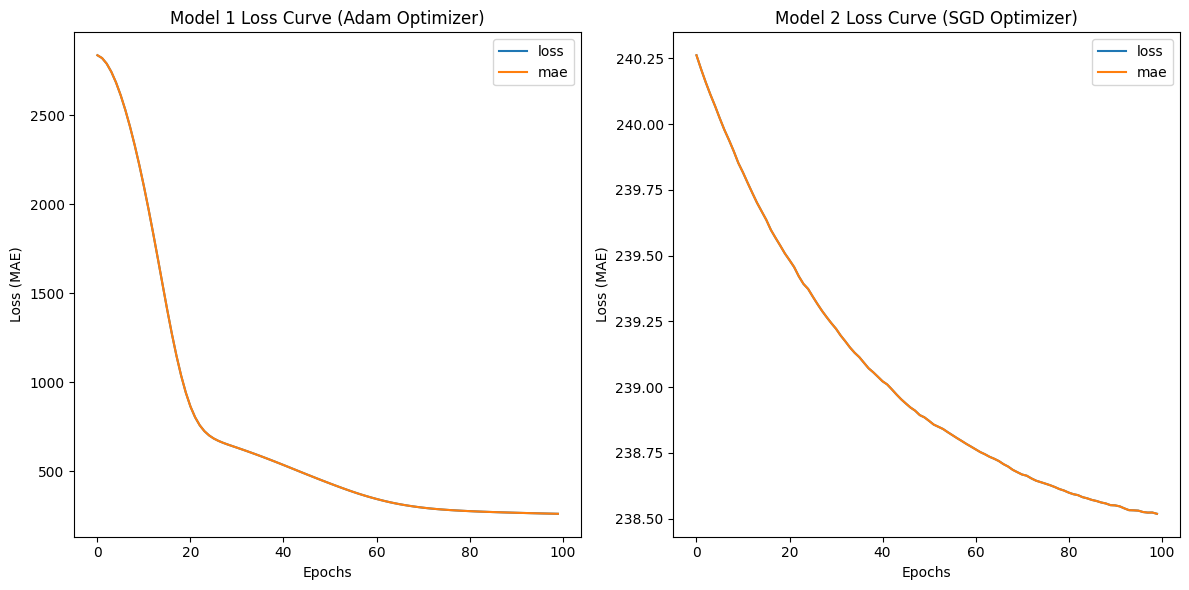

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
pd.DataFrame(history_1.history).plot(ax=plt.gca())
plt.title('Model 1 Loss Curve (Adam Optimizer)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MAE)')

plt.subplot(1, 2, 2)
pd.DataFrame(history_2.history).plot(ax=plt.gca())
plt.title('Model 2 Loss Curve (SGD Optimizer)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MAE)')

plt.tight_layout()
plt.show()

#```Model 3```

In [28]:
data = pd.read_csv("https://raw.githubusercontent.com/DeepCalvin/Kaggle-Electricity-Cost-Prediction/refs/heads/main/electricity_cost_dataset.csv")
data.head()

,site area,structure type,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
0,1360,Mixed-use,2519.0,69,52,188,1,72,1420.0
1,4272,Mixed-use,2324.0,50,76,165,65,261,3298.0
2,3592,Mixed-use,2701.0,20,94,198,39,117,3115.0
3,966,Residential,1000.0,13,60,74,3,35,1575.0
4,4926,Residential,5990.0,23,65,32,57,185,4301.0


In [34]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Creating column transformer
ct = make_column_transformer(
    (MinMaxScaler(),['site area','water consumption','recycling rate','utilisation rate','air qality index', 'issue reolution time','resident count']),
    (OneHotEncoder(handle_unknown='ignore'),['structure type']))

X = data.drop('electricity cost',axis=1)
y = data['electricity cost']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [44]:
# Setting up random seed
tf.random.set_seed(42)

# Creating model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)])

# Compiling
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(0.01),
                metrics = ['mae'])

# Fitting the model
history_3 = model_3.fit(X_train_normal,y_train,epochs=100,verbose=0)

In [45]:
model_3.evaluate(X_test_normal,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 245.4506 - mae: 245.4506  


[243.58692932128906, 243.58692932128906]

Text(0.5, 0, 'Epochs')

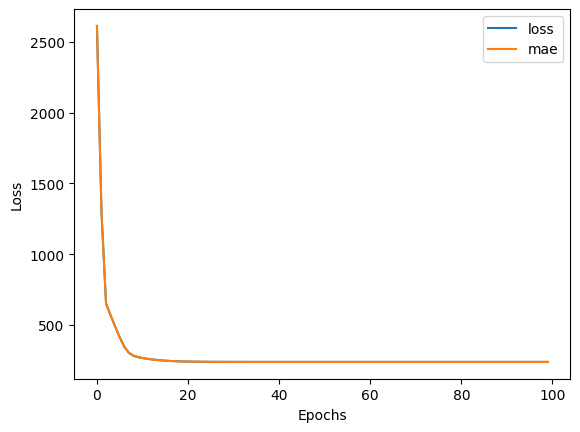

In [46]:
pd.DataFrame(history_3.history).plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')